# Instructions

You will analyze a dataset of the global average sea level change since 1880.
You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

- Use Pandas to import the data from epa-sea-level.csv.
- Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
- Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
- Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
- The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Mounting Google Drive

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Read the dataset from Google Drive
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/epa-sea-level.csv')

df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


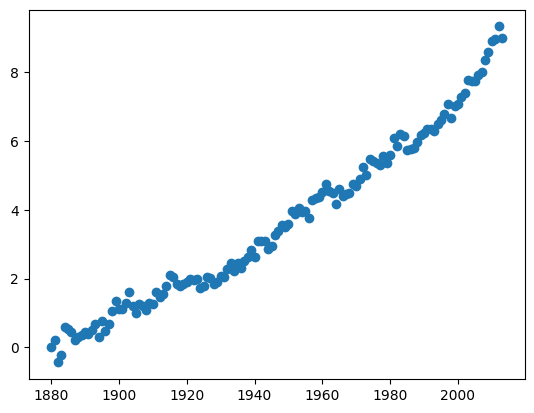

In [10]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

fig, axe = plt.subplots()
plt.scatter(x, y)


In [9]:
linregress(x,y)

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)

Text(0.5, 1.0, 'Rise in Sea Level')

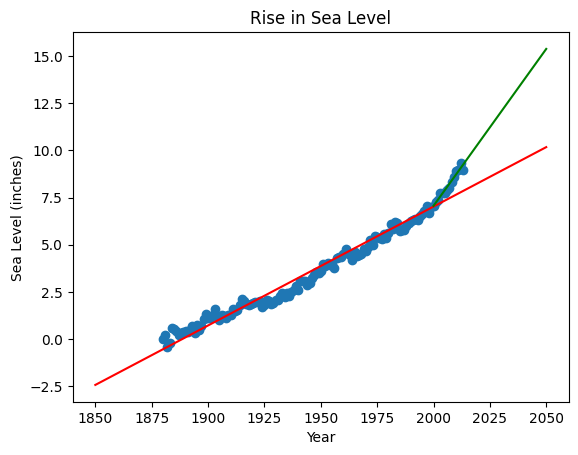

In [27]:
# Create first line of best fit
fig, axe = plt.subplots()
plt.scatter(x, y)
res = linregress(x, y)
x_pred = pd.Series([i for i in range(1850, 2051)])
y_pred = res.slope*x_pred+res.intercept
plt.plot(x_pred, y_pred, 'r')

# Create second line of best fit
df_2 = df[df['Year'] >= 2000].copy()

x_2 = df_2['Year']
y_2 = df_2['CSIRO Adjusted Sea Level']

res_2 = linregress(x_2, y_2)
x_pred_2 = pd.Series([i for i in range(2000, 2051)])
y_pred_2 = res_2.slope*x_pred_2+res_2.intercept

plt.plot(x_pred_2, y_pred_2, 'g')

# Add labels and title
axe.set_xlabel('Year')
axe.set_ylabel('Sea Level (inches)')
axe.set_title('Rise in Sea Level')

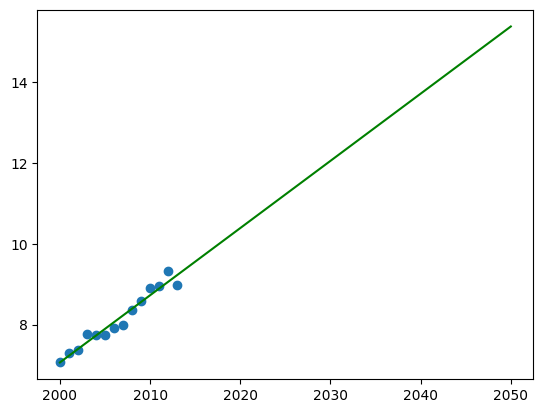